# Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
product = pd.read_csv('/content/drive/MyDrive/UNIGAP/Python/Project 2/product.csv')
product.head(10)

,product_id,category,team_own
0,17,PXXXXXB,ASD
1,18,PXXXXXB,ASD
2,20,PXXXXXB,ASD
3,287,PXXXXXB,ASD
4,372,PXXXXXB,ASD
5,422,PXXXXXB,ASD
6,429,PXXXXXB,ASD
7,430,PXXXXXB,ASD
8,431,PXXXXXB,ASD
9,599,PXXXXXB,ASD


In [ ]:
payment_report = pd.read_csv('/content/drive/MyDrive/UNIGAP/Python/Project 2/payment_report.csv')
payment_report.head(10)

,report_month,payment_group,product_id,source_id,volume
0,2023-01,payment,12,45,624110375
1,2023-01,payment,17,45,335715113
2,2023-01,payment,18,45,737784466
3,2023-01,payment,19,45,120963069
4,2023-01,payment,20,45,319653158
5,2023-01,payment,24,45,2068335003
6,2023-01,payment,32,45,20000
7,2023-01,payment,54,45,270000
8,2023-01,payment,61,45,1284419600
9,2023-01,payment,69,45,136773417


In [ ]:
transactions = pd.read_csv('/content/drive/MyDrive/UNIGAP/Python/Project 2/transactions.csv')
transactions.head(10)

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,extra_info,timeStamp
0,3002692434,5,100000,24,1,10199794.0,199794.0,NaN,1682932054455
1,3002692437,305,20000,2,1,14022211.0,14022211.0,NaN,1682932054912
2,3001960110,7255,48605,22,1,NaN,10530940.0,NaN,1682932055000
3,3002680710,2270,1500000,2,1,10059206.0,59206.0,NaN,1682932055622
4,3002680713,2275,90000,2,1,10004711.0,4711.0,NaN,1682932056197
5,3002680716,2270,200000,2,1,10162232.0,162232.0,NaN,1682932056816
6,3002680719,60,200000,2,1,10093450.0,93450.0,NaN,1682932057141
7,3002680722,6075,1000,2,1,10012978.0,NaN,NaN,1682932057146
8,3002680725,2895,83158,2,1,10089635.0,NaN,NaN,1682932057228
9,3002680728,2250,23600,8,1,35074809.0,212030.0,NaN,1682932057876


# Part I: EDA


Do EDA task:
*   Df payment_enriched (Merge payment_report.csv with product.csv)
*   Df transactions

Suggestions:
*   Any missing data? duplicates? incorrect data types? outliers?
*   Relationships across numerical, categorical, and DateTime data

## Check misssing values, incorrect data types

In [ ]:
payment_report.info()
print()
product.info()
print()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   report_month   919 non-null    object
 1   payment_group  919 non-null    object
 2   product_id     919 non-null    int64 
 3   source_id      919 non-null    int64 
 4   volume         919 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 36.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  492 non-null    int64 
 1   category    492 non-null    object
 2   team_own    492 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324002 entries, 0 to 1324001
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          -------

=> payment_report & product: dữ liệu sạch, không bị missing

  transactions: sender_id, receiver_id bị missing , extra_info bị missing nhiều





In [ ]:
print(transactions['extra_info'].unique())

[nan '{\\orderInfo\\":{\\\\\\"bill_id\\\\\\":\\\\\\"458693172017544298}}"'
 '{\\orderInfo\\":{\\\\\\"bill_id\\\\\\":\\\\\\"458693579921998635}}"' ...
 '{\\orderInfo\\":{\\\\\\"bill_id\\\\\\":1230099137}}"'
 '{\\orderInfo\\":{\\\\\\"bill_id\\\\\\":1229732554}}"'
 '{\\orderInfo\\":{\\\\\\"bill_id\\\\\\":1222998728}}"']


=> extra_info bị thiếu nhiều nhưng thông tin có thể k cần dùng đến

In [ ]:
print(payment_report.isnull().sum()/len(payment_report))
print()
print(product.isnull().sum()/len(product))
print()
print(transactions.isnull().sum()/len(transactions))

report_month     0.0
payment_group    0.0
product_id       0.0
source_id        0.0
volume           0.0
dtype: float64

product_id    0.0
category      0.0
team_own      0.0
dtype: float64

transaction_id    0.000000
merchant_id       0.000000
volume            0.000000
transType         0.000000
transStatus       0.000000
sender_id         0.037054
receiver_id       0.124467
extra_info        0.995397
timeStamp         0.000000
dtype: float64


--> không có giá trị null

## Validate and summarize categorical and numerical data

In [ ]:
print(payment_report.describe(include='all'))
print()
print(product.describe(include='all'))
print()
print(transactions.describe(include='all'))

       report_month payment_group    product_id   source_id        volume
count           919           919    919.000000  919.000000  9.190000e+02
unique            4             2           NaN         NaN           NaN
top         2023-04       payment           NaN         NaN           NaN
freq            281           902           NaN         NaN           NaN
mean            NaN           NaN   1192.517954   44.875952  1.978574e+08
std             NaN           NaN   1293.463329    0.910995  8.367595e+08
min             NaN           NaN      3.000000   37.000000  5.500000e+03
25%             NaN           NaN    640.000000   45.000000  1.250000e+06
50%             NaN           NaN   1059.000000   45.000000  7.982015e+06
75%             NaN           NaN   1585.000000   45.000000  5.447599e+07
max             NaN           NaN  15067.000000   45.000000  1.383171e+10

          product_id category team_own
count     492.000000      492      492
unique           NaN       17    

## Explore relationships across numerical, categorical, and DateTime data

<ipython-input-47-60771ac1c679>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot= sns.heatmap(payment_report.corr())
<ipython-input-47-60771ac1c679>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot= sns.heatmap(transactions.corr())


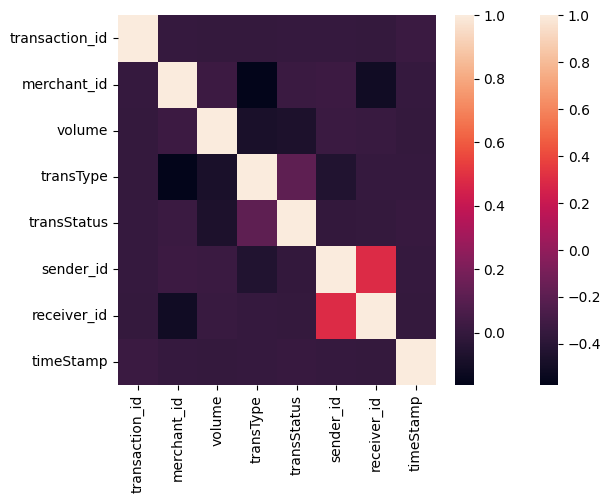

In [ ]:
# plotting correlation heatmap
dataplot= sns.heatmap(payment_report.corr())
dataplot= sns.heatmap(transactions.corr())

## Merge

In [ ]:
# Merge payment_report and product on product_id
payment_enriched = payment_report.merge(product, how='left', left_on= 'product_id', right_on='product_id')
payment_enriched

,report_month,payment_group,product_id,source_id,volume,category,team_own
0,2023-01,payment,12,45,624110375,PXXXXXT,ASD
1,2023-01,payment,17,45,335715113,PXXXXXB,ASD
2,2023-01,payment,18,45,737784466,PXXXXXB,ASD
3,2023-01,payment,19,45,120963069,PXXXXXM2,ASD
4,2023-01,payment,20,45,319653158,PXXXXXB,ASD
...,...,...,...,...,...,...,...
914,2023-04,payment,15067,45,1504000,PXXXXXR,ASL
915,2023-04,refund,1976,37,3542271587,NaN,NaN
916,2023-04,refund,1976,38,13831708189,NaN,NaN
917,2023-04,refund,1976,39,1905435543,NaN,NaN


# Part II: Data Wrangling


## 1. Top 3 product_ids, Top 5 categories with the highest monthly volume.

In [ ]:
# Group by 'product_id', sum up 'volume', and sort in descending order
product_volume = payment_enriched.groupby('product_id')['volume'].sum().sort_values(ascending=False)

# Get the top 3 product_ids
top3_products = product_volume.head(3)

print("Top 3 products by volume:")
print(top3_products)

Top 3 products by volume:
product_id
1976    61797583647
429     14667676567
372     13713658515
Name: volume, dtype: int64


In [ ]:
categories_vol = payment_enriched.groupby('category')['volume'].sum().sort_values(ascending=False)

# Get the top 3 product_ids
top5_categories = categories_vol.head(5)

print("Top 5 Categories by Volume:")
print(top5_categories)

Top 5 Categories by Volume:
category
PXXXXXB     64669365965
PXXXXXR     19077580583
PXXXXXT     12323355071
PXXXXXD1     6143142590
PXXXXXG      4206315258
Name: volume, dtype: int64


## 2. Given that 1 product_id is only owed by 1 team, are there any abnormal products against this rule?


In [ ]:
# Assuming 'payment_enriched' already includes a 'team_own' column
abnormal_products = payment_enriched.groupby('product_id')['team_own'].nunique()

# Filter for product_id with more than one team
abnormal_products = abnormal_products[abnormal_products > 1]

if not abnormal_products.empty:
    print("Abnormal products:")
    print(abnormal_products)
else:
    print("Không có")

Không có


## 3. Since Q2.2023, the team has had the lowest performance. Find the category that contributes the least to that team.


In [ ]:
# đổi data type
payment_report['report_month'] = pd.to_datetime(payment_report['report_month'], format='%Y-%m')

In [ ]:
# lấy ra dữ liệu từ Q2 2023
payment_enriched_filtered = payment_enriched[payment_enriched['report_month'] >= '2023-04']

#the lowest performing team
lowest_team = payment_enriched_filtered.groupby('team_own')['volume'].sum().nsmallest(1)
lowest_team

# bảng của lowest performing team
payment_lowest_performingteam = payment_enriched_filtered[payment_enriched_filtered['team_own'] == lowest_team.index[0]]

#the category that contributes the least to that team.
lowest_team_category = payment_lowest_performingteam.groupby('category')['volume'].sum().nsmallest(1)
lowest_team_category

category
PXXXXXE    25232438
Name: volume, dtype: int64

## 4. Find the contribution of source_ids of refund transactions, what is the source_id with the highest contribution?



In [ ]:
# lấy ra những refund transactions
refund_transactions = payment_enriched[payment_enriched['payment_group'] == 'refund']

# Group by source_id and count the number of refunds
refund_counts = refund_transactions.groupby('source_id')['payment_group'].count().sort_values(ascending=False)

highest_source = refund_counts.head(1)
print("the contribution of source_ids of refund transactions: ")
print(highest_source)

the contribution of source_ids of refund transactions: 
source_id
39    9
Name: payment_group, dtype: int64


## 5. Define type of transactions (‘transaction_type’) for each row, given:


- transType = 2 & merchant_id = 1205: Bank Transfer Transaction
- transType = 2 & merchant_id = 2260: Withdraw Money Transaction
- transType = 2 & merchant_id = 2270: Top Up Money Transaction
- transType = 2 & others merchant_id: Payment Transaction
- transType = 8, merchant_id = 2250: Transfer Money Transaction
- transType = 8 & others merchant_id: Split Bill Transaction
- Remained cases are invalid transactions

In [ ]:
# Define a function to classify transaction types
def get_transaction_type(row):
    if row['transType'] == 2 and row['merchant_id'] == 1205:
        return 'Bank Transfer Transaction'
    elif row['transType'] == 2 and row['merchant_id'] == 2260:
        return 'Withdraw Money Transaction'
    elif row['transType'] == 2 and row['merchant_id'] == 2270:
        return 'Top Up Money Transaction'
    elif row['transType'] == 2:
        return 'Payment Transaction'
    elif row['transType'] == 8 and row['merchant_id'] == 2250:
        return 'Transfer Money Transaction'
    elif row['transType'] == 8:
        return 'Split Bill Transaction'
    else:
        return 'Invalid Transaction'

# Apply the function to create a new column 'transaction_type'
transactions['transaction_type'] = transactions.apply(get_transaction_type, axis=1)

print(transactions)

         transaction_id  merchant_id   volume  transType  transStatus  \
0            3002692434            5   100000         24            1   
1            3002692437          305    20000          2            1   
2            3001960110         7255    48605         22            1   
3            3002680710         2270  1500000          2            1   
4            3002680713         2275    90000          2            1   
...                 ...          ...      ...        ...          ...   
1323997      3003723030          305    20000          2            1   
1323998      3003723033         2270   100000          2            1   
1323999      3003723036         2270   100000          2            1   
1324000      3003723039            5      400         22            1   
1324001      3003602967         2250        1          8            1   

          sender_id  receiver_id extra_info      timeStamp  \
0        10199794.0     199794.0        NaN  1682932054455   

## 6. Of each transaction type (excluding invalid transactions): find the number of transactions, volume, senders and receivers.



In [ ]:
# lấy ra valid transactions
valid_transactions = transactions[transactions['transaction_type'] != 'Invalid Transaction']

# Aggregate data by transaction type
transaction_summary = valid_transactions.groupby('transaction_type').agg(
    num_transactions=('transaction_id', 'count'),        # Count of transactions
    total_volume=('volume', 'sum'),                       # Sum of transaction volumes
    num_senders=('sender_id', 'nunique'),                # Count of unique senders
    num_receivers=('receiver_id', 'nunique')             # Count of unique receivers
)

print(transaction_summary)


                            num_transactions  total_volume  num_senders  \
transaction_type                                                          
Bank Transfer Transaction              37879   50605806190        23156   
Payment Transaction                   398677   71851515181       139583   
Split Bill Transaction                  1376       4901464         1323   
Top Up Money Transaction              290502  108606478829       110409   
Transfer Money Transaction            341177   37033171492        39021   
Withdraw Money Transaction             33725   23418181420        24814   

                            num_receivers  
transaction_type                           
Bank Transfer Transaction            9271  
Payment Transaction                113298  
Split Bill Transaction                572  
Top Up Money Transaction           110409  
Transfer Money Transaction          34585  
Withdraw Money Transaction          24814  
